# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
tb=pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tb[[0]]
     # bivariada para a variável sex com a estatítica de número de saudáveis(coluna = 0)

flag_doente,0
sex,
0.0,72
1.0,92
All,164


In [6]:
tb[[1]]                                 # bivariada para a variável sex com a estatítica de número de doentes(coluna = 1)

flag_doente,1
sex,
0.0,25
1.0,114
All,139


In [7]:
tb[['All']]                                               # bivariada para a variável sex com a estatística do total

flag_doente,All
sex,
0.0,97
1.0,206
All,303


In [8]:
tb['Media_doentes'] = tb[1]/tb['All']
tb[['Media_doentes']]                                   #bivariada para a variável sex com quantidade média de doentes

flag_doente,Media_doentes
sex,
0.0,0.257732
1.0,0.553398
All,0.458746


In [9]:
tb['Odds'] = tb[1]/tb[0]
tb[['Odds']]                                            # bivariada para a variável sex com Odds

flag_doente,Odds
sex,
0.0,0.347222
1.0,1.239130
All,0.847561


In [10]:
tb.loc['All', 'Odds']

0.8475609756097561

In [11]:
tb['Odds_ratio'] = tb['Odds']/tb.loc['All', 'Odds']
tb[['Odds_ratio']]                                      #Odds ratio (Use o total como referência)

flag_doente,Odds_ratio
sex,
0.0,0.409672
1.0,1.461996
All,1.000000


In [12]:
tb['Logito'] = np.log(tb['Odds'])
tb[['Logito']]                                              #Logito (LOG(Odds))

flag_doente,Logito
sex,
0.0,-1.057790
1.0,0.214410
All,-0.165392


In [13]:
tb['WOE'] = np.log(tb['Odds_ratio'])
tb[['WOE']]                                            #O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE)

flag_doente,WOE
sex,
0.0,-0.892398
1.0,0.379802
All,0.000000


In [14]:
tb

flag_doente,0,1,All,Media_doentes,Odds,Odds_ratio,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [15]:
tb.rename(columns = {0:'saudáveis', 1:'doentes'}, index = {0.0:'female', 1.0:'male'}, inplace=True)
tb

flag_doente,saudáveis,doentes,All,Media_doentes,Odds,Odds_ratio,Logito,WOE
sex,,,,,,,,
female,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
male,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [16]:

pd.qcut(df.age, q=5, labels=['idade de 28 a 45', 'idade de 45 a 35', 'idade de 53 a 58', 'idade de 58 a 62', 'idade de 62 a 77']).value_counts()

idade de 53 a 58    71
idade de 45 a 35    64
idade de 28 a 45    63
idade de 62 a 77    60
idade de 58 a 62    45
Name: age, dtype: int64

In [17]:
 #categorizendo a variável 'age' em 5 grupos

df['age_range']=pd.qcut(df.age, q=5, 
        labels=['age from 28 to 45', 'age from 45 to 53', 'age from 53 to 58', 'age from 58 to 62', 'age from 62 to 77'])
                                                                                         

In [18]:
# bivariada para a variável age com a estatítica de número de saudáveis(coluna = 0)
# bivariada para a variável age com a estatítica de número de doentes(coluna = 1)
# bivariada para a variável age com a estatítica de número de todos(coluna = all)


tb1 = pd.crosstab(df['age_range'], df['flag_doente'], margins=True)
tb1                                    # bivariada para a variável age com a estatítica de número de saudáveis(coluna = 0)


flag_doente,0,1,All
age_range,,,
age from 28 to 45,47,16,63
age from 45 to 53,42,22,64
age from 53 to 58,32,39,71
age from 58 to 62,13,32,45
age from 62 to 77,30,30,60
All,164,139,303


In [19]:
tb1['Media_doentes'] = tb1[1]/tb1['All']
tb1[['Media_doentes']]                                   #bivariada para a variável age com quantidade média de doentes

flag_doente,Media_doentes
age_range,
age from 28 to 45,0.253968
age from 45 to 53,0.343750
age from 53 to 58,0.549296
age from 58 to 62,0.711111
age from 62 to 77,0.500000
All,0.458746


In [20]:
tb1['Odds'] = tb1[1]/tb1[0]
tb1[['Odds']]                                            # bivariada para a variável age com Odds

flag_doente,Odds
age_range,
age from 28 to 45,0.340426
age from 45 to 53,0.523810
age from 53 to 58,1.218750
age from 58 to 62,2.461538
age from 62 to 77,1.000000
All,0.847561


In [21]:
tb1.loc['All', 'Odds']

0.8475609756097561

In [22]:
tb1['Odds_ratio'] = tb1['Odds']/tb1.loc['All', 'Odds']
tb1[['Odds_ratio']]                                      #Odds ratio (Use o total como referência)

flag_doente,Odds_ratio
age_range,
age from 28 to 45,0.401653
age from 45 to 53,0.618020
age from 53 to 58,1.437950
age from 58 to 62,2.904261
age from 62 to 77,1.179856
All,1.000000


In [23]:
tb1['Logito'] = np.log(tb1['Odds'])
tb1[['Logito']]                                              #Logito (LOG(Odds))

flag_doente,Logito
age_range,
age from 28 to 45,-1.077559
age from 45 to 53,-0.646627
age from 53 to 58,0.197826
age from 58 to 62,0.900787
age from 62 to 77,0.000000
All,-0.165392


In [24]:
tb1['WOE'] = np.log(tb1['Odds_ratio'])
tb1[['WOE']]                                            #O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE)

flag_doente,WOE
age_range,
age from 28 to 45,-0.912166
age from 45 to 53,-0.481235
age from 53 to 58,0.363218
age from 58 to 62,1.066179
age from 62 to 77,0.165392
All,0.000000


In [25]:
df[['age']].mean()                              # cálculo da média da variável age

age    54.438944
dtype: float64

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

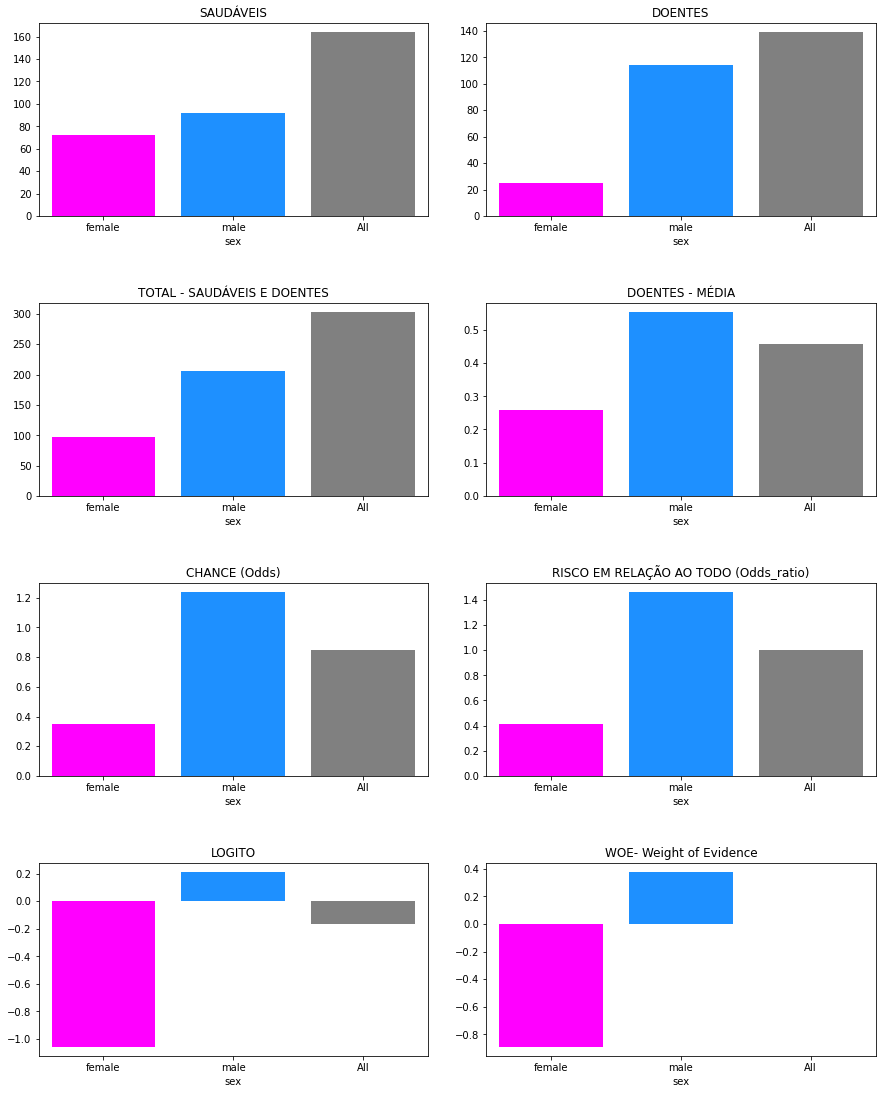

In [85]:
plt.rc('figure', figsize=(15,19))
fig, axes = plt.subplots(4,2)


sns.barplot(ax = axes[0, 0], data=tb[['saudáveis']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[0, 1], data=tb[['doentes']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[1, 0], data=tb[['All']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[1, 1], data=tb[['Media_doentes']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[2, 0], data=tb[['Odds']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[2, 1], data=tb[['Odds_ratio']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[3, 0], data=tb[['Logito']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)
sns.barplot(ax = axes[3, 1], data=tb[['WOE']].T, palette=['magenta','dodgerblue', 'gray'], saturation = 1)


axes[0,0].set_title('SAUDÁVEIS')
axes[0,1].set_title('DOENTES')
axes[1,0].set_title('TOTAL - SAUDÁVEIS E DOENTES')
axes[1,1].set_title('DOENTES - MÉDIA')
axes[2,0].set_title('CHANCE (Odds)')
axes[2,1].set_title('RISCO EM RELAÇÃO AO TODO (Odds_ratio)')
axes[3,0].set_title('LOGITO')
axes[3,1].set_title('WOE- Weight of Evidence')


plt.subplots_adjust(wspace=0.15, hspace=0.45)

In [88]:
tb1

flag_doente,0,1,All,Media_doentes,Odds,Odds_ratio,Logito,WOE
age_range,,,,,,,,
age from 28 to 45,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
age from 45 to 53,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
age from 53 to 58,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
age from 58 to 62,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
age from 62 to 77,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


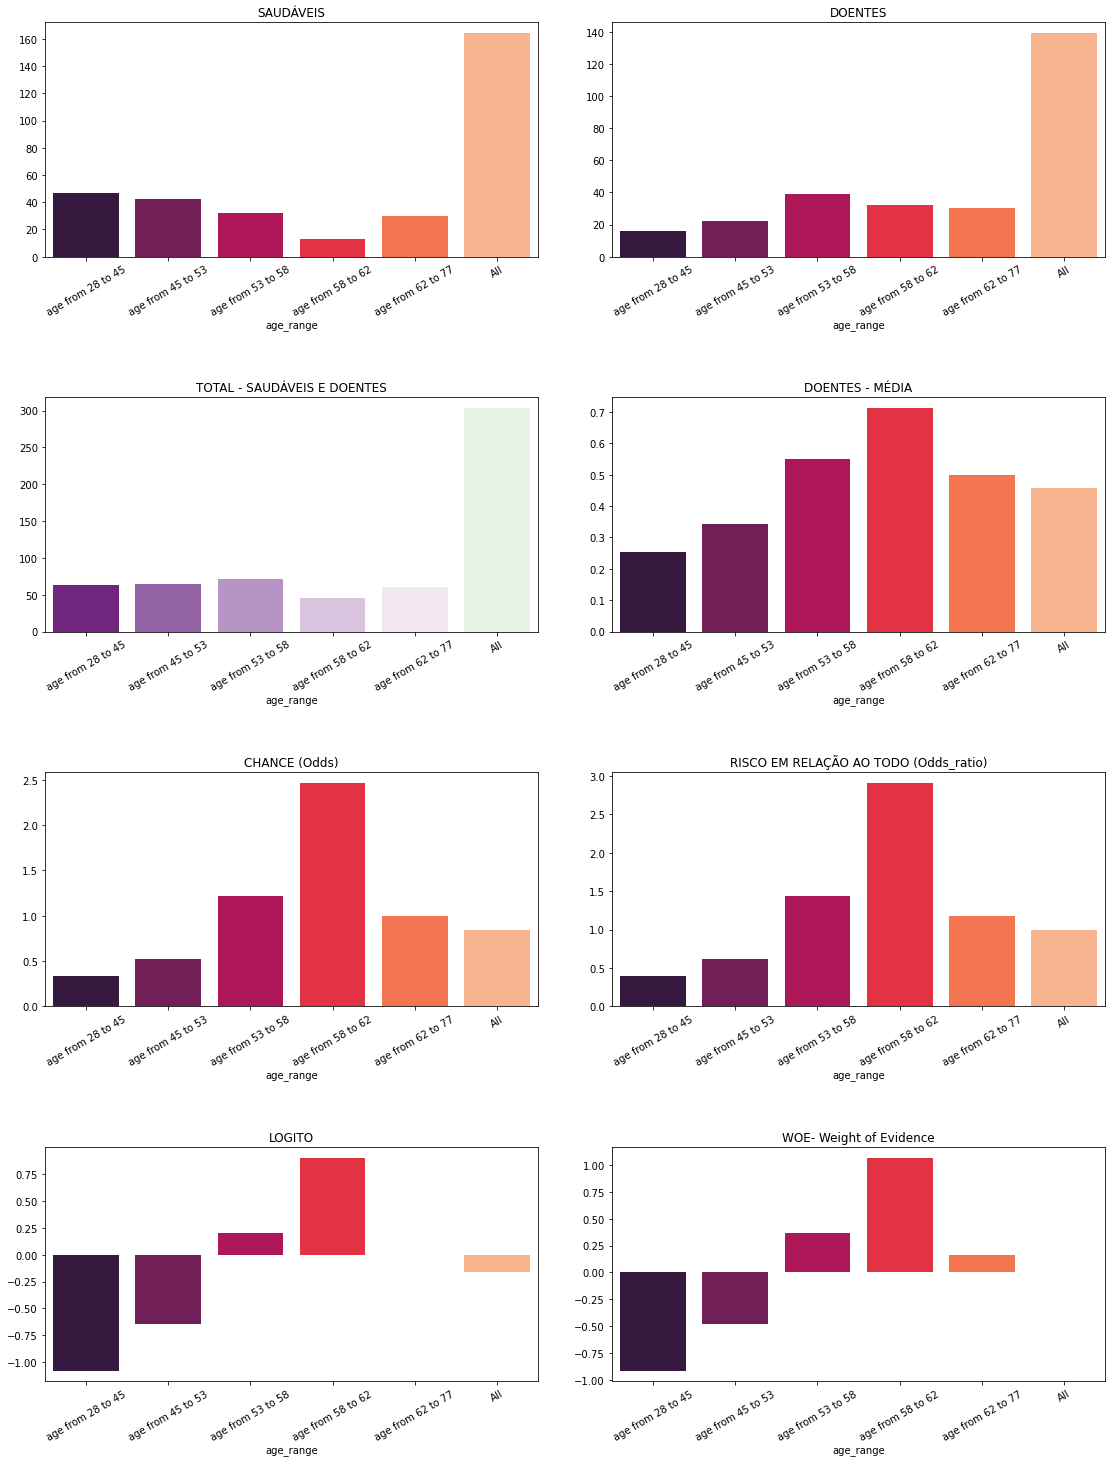

In [122]:
plt.close('all')
plt.rc('figure', figsize=(19, 25))
fig, axes = plt.subplots(4,2)

sns.barplot(ax = axes[0, 0], data=tb1[[0]].T, palette='rocket', saturation = 1)
sns.barplot(ax = axes[0, 1], data=tb1[[1]].T, palette='rocket', saturation = 1)
sns.barplot(ax = axes[1, 0], data=tb1[['All']].T, palette=sns.color_palette("PRGn", 10), saturation = 1)
sns.barplot(ax = axes[1, 1], data=tb1[['Media_doentes']].T, palette='rocket', saturation = 1)
sns.barplot(ax = axes[2, 0], data=tb1[['Odds']].T, palette='rocket', saturation = 1)
sns.barplot(ax = axes[2, 1], data=tb1[['Odds_ratio']].T, palette='rocket', saturation = 1)
sns.barplot(ax = axes[3, 0], data=tb1[['Logito']].T, palette='rocket', saturation = 1)
sns.barplot(ax = axes[3, 1], data=tb1[['WOE']].T, palette='rocket', saturation = 1)

plt.setp(axes[0,0].get_xticklabels(), rotation=30, ha='center')
plt.setp(axes[0,1].get_xticklabels(), rotation=30, ha='center')
plt.setp(axes[1,0].get_xticklabels(), rotation=30, ha='center')
plt.setp(axes[1,1].get_xticklabels(), rotation=30, ha='center')
plt.setp(axes[2,0].get_xticklabels(), rotation=30, ha='center')
plt.setp(axes[2,1].get_xticklabels(), rotation=30, ha='center')
plt.setp(axes[3,0].get_xticklabels(), rotation=30, ha='center')
    
plt.setp(axes[3,1].get_xticklabels(), rotation=30, ha='center')

axes[0,0].set_title('SAUDÁVEIS')
axes[0,1].set_title('DOENTES')
axes[1,0].set_title('TOTAL - SAUDÁVEIS E DOENTES')
axes[1,1].set_title('DOENTES - MÉDIA')
axes[2,0].set_title('CHANCE (Odds)')
axes[2,1].set_title('RISCO EM RELAÇÃO AO TODO (Odds_ratio)')
axes[3,0].set_title('LOGITO')
axes[3,1].set_title('WOE- Weight of Evidence')

plt.subplots_adjust(wspace=0.15, hspace=0.60)